In [256]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import graphviz
import matplotlib as mpl
import seaborn as sns
mpl.style.use('seaborn')
mpl.rcParams['figure.figsize']=(10, 6)
pd.set_option('display.max_columns', None)

In [77]:
train_data = pd.read_csv('train_filter.csv')
df = pd.read_csv('train_ver3.csv')

In [78]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,4,0,0,35,2015-01-12,0,6,1,NaN,1,1,1,2,0,0,2,1,29,0,1,87218.100000,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-01-28,1050611,4,0,1,23,2012-08-10,0,35,1,NaN,1,2,1,1,0,1,2,1,13,1,0,35548.740000,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-01-28,1050612,4,0,1,23,2012-08-10,0,35,1,NaN,1,2,1,2,0,1,2,1,13,1,0,122179.110000,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-01-28,1050613,4,0,0,22,2012-08-10,0,35,1,NaN,1,2,1,2,0,2,2,1,50,2,0,119775.540000,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-01-28,1050614,4,0,1,23,2012-08-10,0,35,1,NaN,1,1,1,2,0,1,2,1,50,2,1,110587.383626,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
df['fecha_dato'] = pd.to_datetime(df['fecha_dato'], format='%Y-%m-%d', errors='coerce')
df.fecha_dato.unique()

array(['2015-01-28T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2015-03-28T00:00:00.000000000', '2015-04-28T00:00:00.000000000',
       '2015-05-28T00:00:00.000000000', '2015-06-28T00:00:00.000000000',
       '2015-07-28T00:00:00.000000000', '2015-08-28T00:00:00.000000000',
       '2015-09-28T00:00:00.000000000', '2015-10-28T00:00:00.000000000',
       '2015-11-28T00:00:00.000000000', '2015-12-28T00:00:00.000000000',
       '2016-01-28T00:00:00.000000000', '2016-02-28T00:00:00.000000000',
       '2016-03-28T00:00:00.000000000', '2016-04-28T00:00:00.000000000',
       '2016-05-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [80]:
time_list = list(df.fecha_dato.unique())
time_list

[numpy.datetime64('2015-01-28T00:00:00.000000000'),
 numpy.datetime64('2015-02-28T00:00:00.000000000'),
 numpy.datetime64('2015-03-28T00:00:00.000000000'),
 numpy.datetime64('2015-04-28T00:00:00.000000000'),
 numpy.datetime64('2015-05-28T00:00:00.000000000'),
 numpy.datetime64('2015-06-28T00:00:00.000000000'),
 numpy.datetime64('2015-07-28T00:00:00.000000000'),
 numpy.datetime64('2015-08-28T00:00:00.000000000'),
 numpy.datetime64('2015-09-28T00:00:00.000000000'),
 numpy.datetime64('2015-10-28T00:00:00.000000000'),
 numpy.datetime64('2015-11-28T00:00:00.000000000'),
 numpy.datetime64('2015-12-28T00:00:00.000000000'),
 numpy.datetime64('2016-01-28T00:00:00.000000000'),
 numpy.datetime64('2016-02-28T00:00:00.000000000'),
 numpy.datetime64('2016-03-28T00:00:00.000000000'),
 numpy.datetime64('2016-04-28T00:00:00.000000000'),
 numpy.datetime64('2016-05-28T00:00:00.000000000')]

In [81]:
test_data = df[df.fecha_dato == time_list[-1]]
test_previous_data = df[df.fecha_dato == time_list[-2]]

In [136]:
test_previous_data = test_previous_data.set_index(['ncodpers'])
test_previous_data.head(10)

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
ncodpers,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
896836,2016-04-28,4,0,0,72,2010-11-12,0,65,1,NaN,1,2,1,2,0,45,2,1,39,22,0,315824.520000,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
896837,2016-04-28,4,0,0,57,2010-11-12,0,65,1,NaN,1,2,1,2,0,5,2,1,48,32,0,110388.476821,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
896839,2016-04-28,4,0,1,39,2010-11-12,0,65,1,NaN,1,1,1,2,0,7,2,1,45,3,1,46618.470000,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
896853,2016-04-28,4,0,0,71,2010-11-12,0,65,1,NaN,1,2,1,2,0,5,2,1,50,2,0,205204.110000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
896849,2016-04-28,4,0,1,25,2010-11-12,0,65,1,NaN,1,1,1,2,0,4,2,1,28,18,1,100300.170000,3,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
896851,2016-04-28,4,0,1,39,2010-11-12,0,65,1,NaN,1,1,1,2,0,5,2,1,50,2,1,205204.110000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
896852,2016-04-28,4,0,0,51,2010-11-12,0,65,1,NaN,1,2,1,2,0,5,2,1,50,2,0,205204.110000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
896848,2016-04-28,4,0,0,39,2011-09-30,0,55,1,NaN,1,1,1,2,0,5,2,1,46,26,1,65970.690000,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
896835,2016-04-28,4,0,0,8,2010-11-12,0,65,1,NaN,1,1,1,2,0,5,2,1,8,9,1,260723.250000,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [218]:
test_previous_data = test_previous_data.drop(['fecha_dato', 'fecha_alta', 'ult_fec_cli_1t'], axis=1)

In [44]:
train_data.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,y_label
0,2015-05-28,1048863,4,0,1,23,2012-08-09,0,35,1,2012-08-09,1,2,1,2,0,1,2,1,28,18,0,107095.95,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1,2015-05-28,1048863,4,0,1,23,2012-08-09,0,35,1,2012-08-09,1,2,1,2,0,1,2,1,28,18,0,107095.95,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21
2,2015-05-28,1048863,4,0,1,23,2012-08-09,0,35,1,2012-08-09,1,2,1,2,0,1,2,1,28,18,0,107095.95,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22
3,2015-05-28,1049014,4,0,0,42,2012-08-09,0,35,1,2012-08-09,1,1,1,2,0,4,2,1,28,18,1,166677.00,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23
4,2015-05-28,1049040,4,0,1,43,2012-08-09,0,35,1,2012-08-09,1,1,1,2,0,4,2,1,38,48,1,56125.17,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21


In [45]:
train_data = train_data.drop(['fecha_dato', 'fecha_alta', 'ult_fec_cli_1t'], axis=1)
train_data = train_data.set_index(['ncodpers'])

In [46]:
train_data.head()

,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,y_label
ncodpers,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1048863,4,0,1,23,0,35,1,1,2,1,2,0,1,2,1,28,18,0,107095.95,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1048863,4,0,1,23,0,35,1,1,2,1,2,0,1,2,1,28,18,0,107095.95,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21
1048863,4,0,1,23,0,35,1,1,2,1,2,0,1,2,1,28,18,0,107095.95,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22
1049014,4,0,0,42,0,35,1,1,1,1,2,0,4,2,1,28,18,1,166677.00,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23
1049040,4,0,1,43,0,35,1,1,1,1,2,0,4,2,1,38,48,1,56125.17,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21


In [49]:
x_train = train_data.iloc[:, :20]
y_train = train_data.iloc[:,-1]

In [54]:
dtrain = xgb.DMatrix(x_train, label=y_train)

In [59]:
param = {}
param['objective'] = 'multi:softprob'
param['eta'] = 0.05
param['max_depth'] = 8
param['silent'] = 1
param['num_class'] = 24
param['eval_metric'] = 'mlogloss'
param['min_child_weight'] = 1
param['subsample'] = 0.7
param['colsample_bytree'] = 0.7
param['seed'] = 0
num_rounds = 30

In [61]:
bst = xgb.train(param, dtrain, num_rounds)
bst.dump_model('dump.raw.txt')

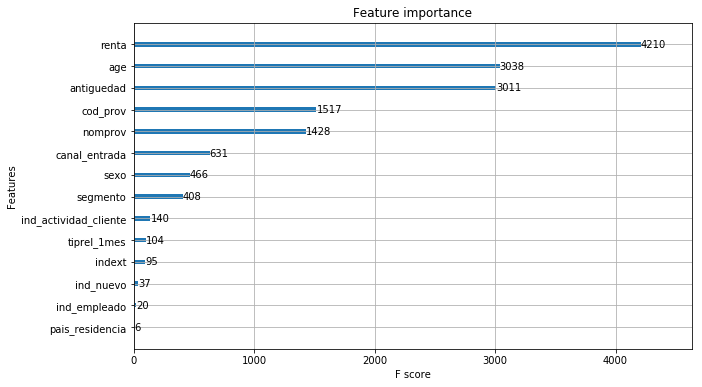

In [216]:
xgb.plot_importance(bst)

In [82]:
test_data = test_data.drop(['fecha_dato', 'fecha_alta', 'ult_fec_cli_1t'], axis=1)
test_data = test_data.set_index(['ncodpers'])

In [83]:
test_data.head()

,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
ncodpers,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
657640,4,0,0,68,0,114,1,1,2,1,2,0,37,2,1,28,18,0,147347.970000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
657788,4,0,0,42,0,114,1,1,1,1,2,0,102,2,1,28,18,1,132559.350000,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
657795,4,0,1,44,0,114,1,1,1,1,2,0,46,2,1,26,34,1,81399.570000,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
657790,4,0,1,42,0,114,1,1,1,1,2,0,102,2,1,48,32,1,110388.476821,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1
657794,4,0,0,49,0,114,1,1,1,1,2,0,5,2,1,8,9,1,102189.000000,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
x_test = test_data.iloc[:10000, :20]
x_test.head()

,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
ncodpers,,,,,,,,,,,,,,,,,,,,
657640,4,0,0,68,0,114,1,1,2,1,2,0,37,2,1,28,18,0,147347.970000,2
657788,4,0,0,42,0,114,1,1,1,1,2,0,102,2,1,28,18,1,132559.350000,2
657795,4,0,1,44,0,114,1,1,1,1,2,0,46,2,1,26,34,1,81399.570000,2
657790,4,0,1,42,0,114,1,1,1,1,2,0,102,2,1,48,32,1,110388.476821,2
657794,4,0,0,49,0,114,1,1,1,1,2,0,5,2,1,8,9,1,102189.000000,1


In [86]:
dtest = xgb.DMatrix(x_test)

In [87]:
pred = bst.predict(dtest)

In [90]:
pred

array([[0.01969908, 0.01969929, 0.06512196, ..., 0.04485806, 0.02439797,
        0.11602059],
       [0.02039444, 0.02039466, 0.06543113, ..., 0.05851862, 0.05838458,
        0.18065612],
       [0.01985806, 0.01985828, 0.05670962, ..., 0.08643463, 0.05977665,
        0.20265357],
       ...,
       [0.01999696, 0.01999717, 0.05808351, ..., 0.09389301, 0.07536837,
        0.22727339],
       [0.01962748, 0.01962769, 0.04860213, ..., 0.12269448, 0.08514949,
        0.16491844],
       [0.01973924, 0.01973945, 0.06050958, ..., 0.04091149, 0.03341442,
        0.15698527]], dtype=float32)

In [116]:
columns_list = list(df.columns)
index_list = list(x_test.index)
product_list = columns_list[24:]

In [105]:
product_df = pd.DataFrame(columns=columns_list[24:], index=index_list)
product_df.head()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
657640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
for i in range(len(index_list)):
    product_df.iloc[i,:] = pred[i,:]

In [115]:
product_df.head()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
657640,0.0196991,0.0196993,0.065122,0.0197951,0.0264265,0.0196989,0.0199603,0.0344659,0.0200308,0.0197817,0.019854,0.071992,0.0612963,0.0656174,0.0200322,0.0199861,0.0250587,0.104173,0.117421,0.0249137,0.0196994,0.0448581,0.024398,0.116021
657788,0.0203944,0.0203947,0.0654311,0.0204938,0.0537479,0.0203943,0.0212833,0.0210403,0.0216617,0.0217711,0.0205548,0.0343277,0.0350326,0.0377147,0.0207393,0.0206916,0.0205392,0.0364238,0.143775,0.0256345,0.0203947,0.0585186,0.0583846,0.180656
657795,0.0198581,0.0198583,0.0567096,0.0199548,0.0459,0.0198579,0.0207235,0.020283,0.0200892,0.0211986,0.0200142,0.0351478,0.0292992,0.032647,0.0201939,0.0201474,0.019999,0.0344593,0.12865,0.0262855,0.0198583,0.0864346,0.0597766,0.202654
657790,0.0210093,0.0210095,0.0877823,0.0211116,0.0431776,0.0210091,0.0219249,0.021529,0.0215894,0.0224275,0.0211745,0.037302,0.037316,0.0490866,0.0213646,0.0213154,0.0211584,0.0271646,0.0881976,0.0291964,0.0210096,0.0673139,0.0662479,0.189582
657794,0.019111,0.0191112,0.0393862,0.0192041,0.0420208,0.0191109,0.0192899,0.0245114,0.020198,0.0191113,0.0192613,0.0756511,0.0395293,0.0319476,0.0194342,0.0193895,0.0192466,0.0247333,0.163809,0.0255395,0.0191113,0.0992004,0.0787446,0.123348


In [139]:
for user_id in index_list:
    if user_id in test_previous_data.index:
        for product in product_list:
            if test_previous_data.loc[user_id, product] == 1:
                product_df.loc[user_id,product] = 0
    if user_id not in test_previous_data.index:
        pass

In [160]:
for column_name in product_list:
    product_df[column_name] = pd.to_numeric(product_df[column_name], errors='coerce')
product_df.head()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
657640,0.019699,0.019699,0.065122,0.019795,0.026427,0.019699,0.019960,0.034466,0.020031,0.019782,0.019854,0.071992,0.061296,0.065617,0.020032,0.019986,0.025059,0.104173,0.117421,0.024914,0.019699,0.044858,0.024398,0.116021
657788,0.020394,0.020395,0.000000,0.020494,0.053748,0.020394,0.021283,0.021040,0.021662,0.021771,0.020555,0.034328,0.035033,0.037715,0.020739,0.020692,0.020539,0.036424,0.143775,0.025635,0.020395,0.058519,0.058385,0.180656
657795,0.019858,0.019858,0.000000,0.019955,0.045900,0.019858,0.020724,0.020283,0.020089,0.021199,0.020014,0.035148,0.029299,0.032647,0.020194,0.020147,0.019999,0.034459,0.128650,0.026285,0.019858,0.086435,0.059777,0.202654
657790,0.021009,0.021010,0.087782,0.021112,0.000000,0.021009,0.021925,0.021529,0.021589,0.022428,0.021175,0.037302,0.000000,0.049087,0.021365,0.021315,0.021158,0.027165,0.000000,0.029196,0.021010,0.000000,0.000000,0.000000
657794,0.019111,0.019111,0.000000,0.019204,0.042021,0.019111,0.019290,0.024511,0.020198,0.019111,0.019261,0.000000,0.039529,0.031948,0.019434,0.019389,0.019247,0.024733,0.163809,0.025540,0.019111,0.099200,0.078745,0.123348


In [414]:
threshold = 0.01
product_dict = {}

In [415]:
for user_id in index_list:
    product_dict[user_id] = []
    i = 0
    for product in product_df.loc[user_id].sort_values(ascending=False).index:
        if product_df.loc[user_id, product] >= threshold:
            product_dict[user_id].append(product)
            i += 1
            if i>= 7:
                break

In [416]:
product_dict

{657640: ['ind_tjcr_fin_ult1',
  'ind_recibo_ult1',
  'ind_reca_fin_ult1',
  'ind_dela_fin_ult1',
  'ind_fond_fin_ult1',
  'ind_cco_fin_ult1',
  'ind_ecue_fin_ult1'],
 657788: ['ind_recibo_ult1',
  'ind_tjcr_fin_ult1',
  'ind_nomina_ult1',
  'ind_nom_pens_ult1',
  'ind_cno_fin_ult1',
  'ind_fond_fin_ult1',
  'ind_reca_fin_ult1'],
 657795: ['ind_recibo_ult1',
  'ind_tjcr_fin_ult1',
  'ind_nomina_ult1',
  'ind_nom_pens_ult1',
  'ind_cno_fin_ult1',
  'ind_dela_fin_ult1',
  'ind_reca_fin_ult1'],
 657790: ['ind_cco_fin_ult1',
  'ind_fond_fin_ult1',
  'ind_dela_fin_ult1',
  'ind_valo_fin_ult1',
  'ind_reca_fin_ult1',
  'ind_deco_fin_ult1',
  'ind_ctma_fin_ult1'],
 657794: ['ind_tjcr_fin_ult1',
  'ind_recibo_ult1',
  'ind_nomina_ult1',
  'ind_nom_pens_ult1',
  'ind_cno_fin_ult1',
  'ind_ecue_fin_ult1',
  'ind_fond_fin_ult1'],
 657797: ['ind_recibo_ult1',
  'ind_tjcr_fin_ult1',
  'ind_reca_fin_ult1',
  'ind_cco_fin_ult1',
  'ind_ecue_fin_ult1',
  'ind_nomina_ult1',
  'ind_nom_pens_ult1'],
 657

In [417]:
product_dict_after_filter = {}
for key, value in product_dict.items():
    if len(value) != 0:
        product_dict_after_filter[key] = value

In [418]:
product_dict_after_filter

{657640: ['ind_tjcr_fin_ult1',
  'ind_recibo_ult1',
  'ind_reca_fin_ult1',
  'ind_dela_fin_ult1',
  'ind_fond_fin_ult1',
  'ind_cco_fin_ult1',
  'ind_ecue_fin_ult1'],
 657788: ['ind_recibo_ult1',
  'ind_tjcr_fin_ult1',
  'ind_nomina_ult1',
  'ind_nom_pens_ult1',
  'ind_cno_fin_ult1',
  'ind_fond_fin_ult1',
  'ind_reca_fin_ult1'],
 657795: ['ind_recibo_ult1',
  'ind_tjcr_fin_ult1',
  'ind_nomina_ult1',
  'ind_nom_pens_ult1',
  'ind_cno_fin_ult1',
  'ind_dela_fin_ult1',
  'ind_reca_fin_ult1'],
 657790: ['ind_cco_fin_ult1',
  'ind_fond_fin_ult1',
  'ind_dela_fin_ult1',
  'ind_valo_fin_ult1',
  'ind_reca_fin_ult1',
  'ind_deco_fin_ult1',
  'ind_ctma_fin_ult1'],
 657794: ['ind_tjcr_fin_ult1',
  'ind_recibo_ult1',
  'ind_nomina_ult1',
  'ind_nom_pens_ult1',
  'ind_cno_fin_ult1',
  'ind_ecue_fin_ult1',
  'ind_fond_fin_ult1'],
 657797: ['ind_recibo_ult1',
  'ind_tjcr_fin_ult1',
  'ind_reca_fin_ult1',
  'ind_cco_fin_ult1',
  'ind_ecue_fin_ult1',
  'ind_nomina_ult1',
  'ind_nom_pens_ult1'],
 657

In [295]:
actual_previous_month_data = test_previous_data.iloc[:, 20:]
actual_product = test_data.iloc[:, 20:]
actual_product_list = {}

In [296]:
for user_id in product_df.index:
    actual_product_list[user_id] = []
    if user_id in actual_previous_month_data.index:
        for column_name in actual_product.columns:
            if actual_product.loc[user_id, column_name] == 1 and actual_previous_month_data.loc[user_id, column_name] == 0:
                actual_product_list[user_id].append(column_name)
    if user_id not in actual_previous_month_data.index:
        for column_name in actual_product.columns:
            if actual_product.loc[user_id, column_name] == 1:
                actual_product_list[user_id].append(column_name)

In [297]:
actual_dict_after_filter = {}
for key, value in actual_product_list.items():
    if len(value) != 0:
        actual_dict_after_filter[key] = value

In [357]:
actual_dict_after_filter

{647987: ['ind_recibo_ult1'],
 648035: ['ind_recibo_ult1'],
 648164: ['ind_ctma_fin_ult1'],
 648289: ['ind_recibo_ult1'],
 648321: ['ind_recibo_ult1'],
 648406: ['ind_nomina_ult1', 'ind_nom_pens_ult1'],
 648421: ['ind_recibo_ult1'],
 648424: ['ind_tjcr_fin_ult1'],
 648468: ['ind_recibo_ult1'],
 648472: ['ind_ecue_fin_ult1'],
 648541: ['ind_recibo_ult1'],
 648607: ['ind_recibo_ult1'],
 648609: ['ind_cno_fin_ult1'],
 648623: ['ind_tjcr_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1'],
 648626: ['ind_recibo_ult1'],
 648711: ['ind_nomina_ult1', 'ind_nom_pens_ult1'],
 648746: ['ind_cco_fin_ult1'],
 648752: ['ind_nomina_ult1', 'ind_nom_pens_ult1'],
 648784: ['ind_tjcr_fin_ult1'],
 648828: ['ind_cno_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1'],
 648883: ['ind_recibo_ult1'],
 648913: ['ind_recibo_ult1'],
 649008: ['ind_recibo_ult1'],
 649032: ['ind_nomina_ult1', 'ind_nom_pens_ult1'],
 649164: ['ind_nomina_ult1', 'ind_nom_pens_ult1'],
 649204: ['ind_recibo_ult1'],
 649221: ['ind_tjcr_fi

In [436]:
len(actual_dict_after_filter)

265

# MAP@7 Evaluation

In [355]:
def average_precision(actual, predicted, k=7):
    
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0
    if len(predicted) == 0 and len(actual) == 0: # if both null values than the average precision is 1. 
        return 1
    elif len(predicted) == 0 and len(actual) != 0:
        return 0
    elif len(predicted) != 0 and len(actual) == 0:
        return 0
    else:
        for i,p in enumerate(predicted):
            if p in actual and p in predicted[:i+1]:
                num_hits += 1.0
                score += num_hits / (i+1) #precision for each step
    if not actual:
        return 0
    return score / min(len(actual), k)

In [356]:
def get_map(actual, predict, k = 7):
    count = 0
    ap = 0
    for key , value in predict.items():
        list1 = value
        if key in actual.keys():
            list2 = actual[key]
            ap+= average_precision(list2, list1)
            count+=1
        elif key not in actual.keys():
            ap+=0
            count+=1
    if count == 0:
        return np.nan
    else:
        result = ap/count
        return result

In [304]:
get_map(actual_product_list, product_dict)

0.9722944588917783

In [305]:
MAP_list = []
for threshold in range(10,50):
    product_dict = {}
    for user_id in index_list:
        product_dict[user_id] = []
        for product in product_df.loc[user_id].sort_values(ascending=False).index:
            if product_df.loc[user_id, product] >= threshold/100:
                product_dict[user_id].append(product)
    MAP_list.append(get_map(actual_product_list, product_dict))

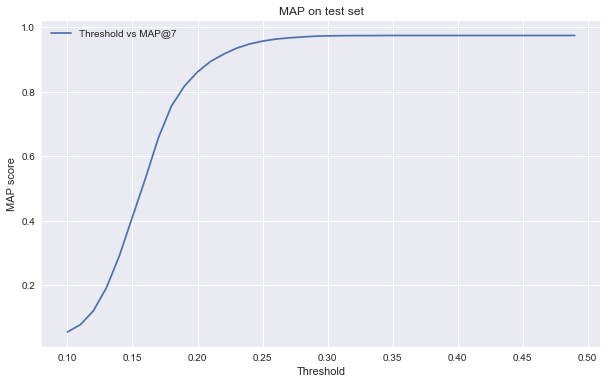

In [306]:
x_list = np.arange(10,50)/100
plt.plot(x_list, MAP_list, label = 'Threshold vs MAP@7'.format(x_list))
plt.legend(loc='upper right', fontsize=8)
plt.xlabel('Threshold')
plt.ylabel('MAP score')
plt.legend(loc='best')
plt.title("MAP on test set")
plt.show()

In [307]:
x_list = np.arange(10,50) / 100

In [308]:
x_list

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49])

In [398]:
def get_hit_rate(actual, predict):
    count = 0
    hit_count = 0
    for key , value in predict.items():
        list1 = value
        if key in actual.keys():
            list2 = actual[key]
            common =  set(list1) & set(list2)
            if len(common) > 0:
                hit_count+=1
            if len(list2) != 0: # if the test set is not null. then count it as targeting customers
                count+=1 # if the prediction is not null or test is not null
        if key not in actual.keys():
            hit_count += 0
            count += 1
    if count == 0:
        return np.nan
    else:
        result = hit_count/count
        return result

In [420]:
get_hit_rate(product_dict_after_filter, actual_dict_after_filter)

0.9433962264150944

In [310]:
hit_rate_list = []
for threshold in range(10,50):
    product_dict = {}
    for user_id in index_list:
        product_dict[user_id] = []
        for product in product_df.loc[user_id].sort_values(ascending=False).index:
            if product_df.loc[user_id, product] >= threshold/100:
                product_dict[user_id].append(product)
    hit_rate_list.append(get_hit_rate(actual_product_list, product_dict))

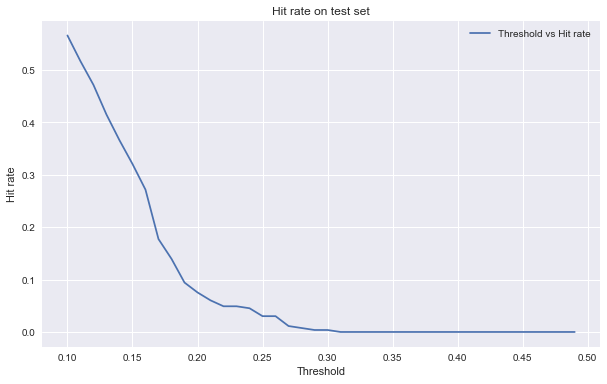

In [311]:
x_list = np.arange(10,50)/100
plt.plot(x_list, hit_rate_list, label = 'Threshold vs Hit rate'.format(x_list))
plt.legend(loc='upper right', fontsize=8)
plt.xlabel('Threshold')
plt.ylabel('Hit rate')
plt.legend(loc='best')
plt.title("Hit rate on test set")
plt.show()

In [432]:
MAP_list_excluding_empty_set = []
for threshold in range(1,50):
    product_dict = {}
    i = 0
    for user_id in index_list:
        product_dict[user_id] = []
        for product in product_df.loc[user_id].sort_values(ascending=False).index:
            if product_df.loc[user_id, product] >= threshold/100:
                product_dict[user_id].append(product)
                i += 1
                if i >= 7:
                    break
    product_dict_after_filter = {}
    for key, value in product_dict.items():
        if len(value) != 0:
            product_dict_after_filter[key] = value            
    MAP_list_excluding_empty_set.append(get_map(actual_dict_after_filter, product_dict_after_filter))

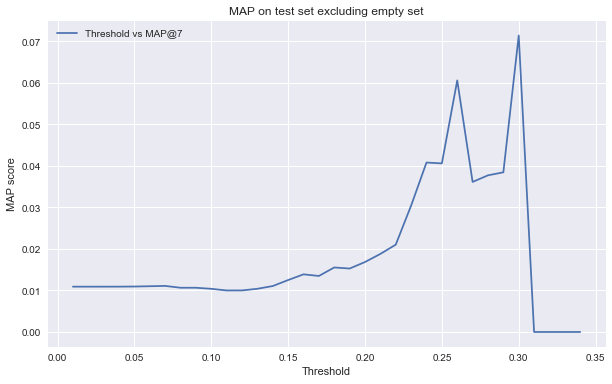

In [433]:
x_list = np.arange(1,50)/100
plt.plot(x_list, MAP_list_excluding_empty_set, label = 'Threshold vs MAP@7'.format(x_list))
plt.legend(loc='upper right', fontsize=8)
plt.xlabel('Threshold')
plt.ylabel('MAP score')
plt.legend(loc='best')
plt.title("MAP on test set excluding empty set")
plt.show()

In [434]:
hit_rate_list_excluding_empty_set = []
for threshold in range(0,50):
    product_dict = {}
    for user_id in index_list:
        product_dict[user_id] = []
        i = 0
        for product in product_df.loc[user_id].sort_values(ascending=False).index:
            if product_df.loc[user_id, product] >= threshold/100:
                product_dict[user_id].append(product)
                i += 1
                if i >= 7:
                    break
    product_dict_after_filter = {}
    for key, value in product_dict.items():
        if len(value) != 0:
            product_dict_after_filter[key] = value            
    hit_rate_list_excluding_empty_set.append(get_hit_rate(product_dict_after_filter, actual_dict_after_filter))

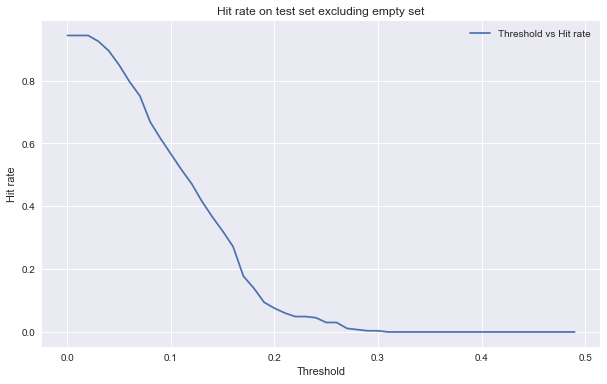

In [435]:
x_list = np.arange(0,50)/100
plt.plot(x_list, hit_rate_list_excluding_empty_set, label = 'Threshold vs Hit rate'.format(x_list))
plt.legend(loc='upper right', fontsize=8)
plt.xlabel('Threshold')
plt.ylabel('Hit rate')
plt.legend(loc='best')
plt.title("Hit rate on test set excluding empty set")
plt.show()